In [1]:
!pip install prophet awswrangler

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p38/bin/python -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import awswrangler as wr
path = f"s3://source-voltar/source/file1.csv"
df=wr.s3.read_csv(path)
df.head()

,date,open,high,low,close,adjclose,volume,ticker
0,2015-07-10,30.485001,30.962500,30.3025,30.820000,28.014683,245418000,AAPL
1,2015-07-13,31.257500,31.440001,31.0800,31.415001,28.555523,165762000,AAPL
2,2015-07-14,31.510000,31.592501,31.2600,31.402500,28.544159,127072400,AAPL
3,2015-07-15,31.430000,31.787500,31.3950,31.705000,28.819126,134596800,AAPL
4,2015-07-16,31.934999,32.142502,31.8375,32.127499,29.203163,144889600,AAPL


In [7]:
df.describe()

,open,high,low,close,adjclose,volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,70.733236,71.534891,69.966477,70.785166,69.253966,1.297978e+08
std,46.727606,47.339203,46.120570,46.751325,47.210288,6.505055e+07
min,22.500000,22.917500,22.367500,22.584999,20.949610,4.100000e+07
25%,35.727499,35.898750,35.471876,35.578126,33.642254,8.723265e+07
50%,48.266251,48.741251,47.942499,48.350000,46.685949,1.114764e+08
75%,116.355000,117.695002,114.589996,116.017500,114.828997,1.520264e+08
max,182.630005,182.940002,179.119995,182.009995,181.259933,6.488252e+08


In [9]:
# Select only the important features i.e. the date and price
data = df[["date","close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = df.rename(columns = {"date":"ds","close":"y"}) #renaming the columns of the dataset
data.head(5)

,ds,open,high,low,y,adjclose,volume,ticker
0,2015-07-10,30.485001,30.962500,30.3025,30.820000,28.014683,245418000,AAPL
1,2015-07-13,31.257500,31.440001,31.0800,31.415001,28.555523,165762000,AAPL
2,2015-07-14,31.510000,31.592501,31.2600,31.402500,28.544159,127072400,AAPL
3,2015-07-15,31.430000,31.787500,31.3950,31.705000,28.819126,134596800,AAPL
4,2015-07-16,31.934999,32.142502,31.8375,32.127499,29.203163,144889600,AAPL


In [11]:
from prophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

15:29:57 - cmdstanpy - INFO - Chain [1] start processing
15:29:58 - cmdstanpy - INFO - Chain [1] done processing


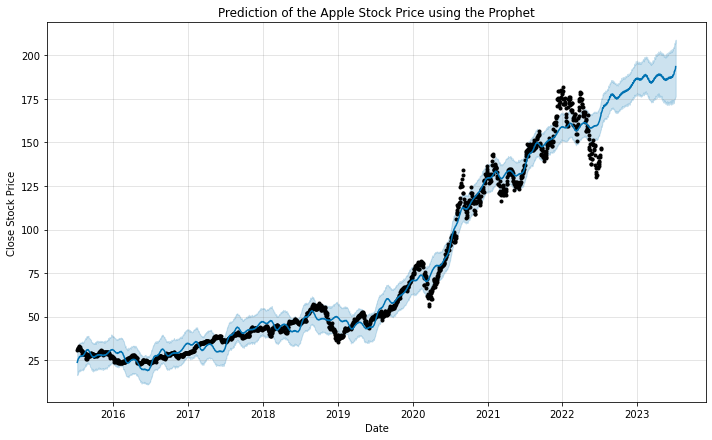

In [13]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Apple Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.savefig('plots/Stock-Prophet-Plot.jpg',bbox_inches='tight')
plt.show()

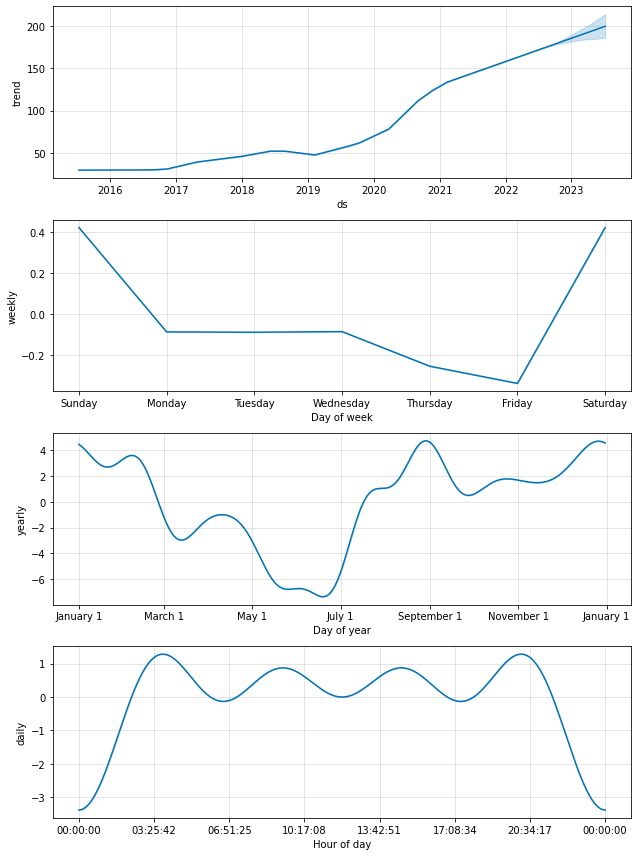

In [15]:
m.plot_components(prediction)
plt.savefig('plots/Stock-Prophet-Seasonal-Plot.jpg',bbox_inches='tight')
plt.show()